## <center> 5. Визуализация данных в Pandas

Визуализация данных — важный компонент любого исследования в области анализа данных. Наглядные и информационно адекватые графики и диаграммы порой бывают более понятны, чем многословное объяснение.

Визуализация данных - это мощный способ улавливать зависимости и представлять информацию, полученную на основе данных. Среди средств, доступных в Python, имеется множество инструментов визуализации данных, но на этом занятии мы собираемся изучить построение графиков и диаграмм с помощью пакета Pandas.

Как один из базовых инструментов в области анализа данных Pandas предоставляет несколько отличных возможностей для визуализации данных.
    
На прошлом занятии вы рассматривали библиотеку **Matplotlib** и знаете, как важно визуализировать данные в Data Science и Machine Learning. Вы научились строить линейные графики, диаграмму рассеяния и гистограмму, пользуясь возможностями  **Matplotlib**.
    
Достоинством Pandas является то, что эти же самые графики могут быть построены в Pandas без явного импортирования **Matplotlib**, причем организовать такое построение можно разными способами. Предварительно стоит отметить, что Pandas "под капотом" неявно использует библиотеку **Matplotlib** для визуализации, хотя нигде в коде не надо указывать, что она импортируется. Поэтому библиотека **Matplotlib** должна быть предварительно установлена.

Т.к. в ходе данной лабораторной работы мы рассмотрим примеры визуализации данных средствами Pandas, то эту библиотеку изначально изначально необходимо подключить. Заодно  подключим и NumPy:

In [ ]:
import pandas as pd
import numpy as np

## <center> Построение линейного графика
  
Вспомним, как мы на прошлой лабораторной работе рисовали графики функций средствами **Matplotlib**

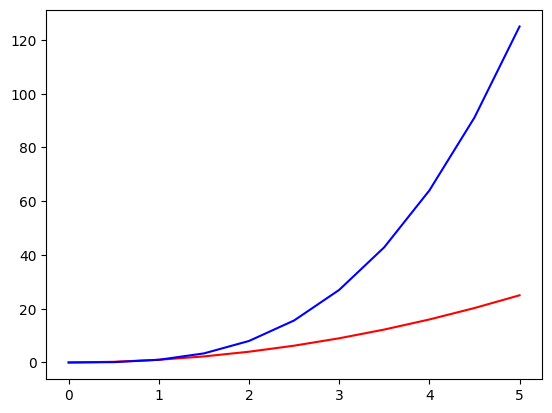

In [ ]:
x = np.linspace(0, 5, 11)                   # генерация массива аргументов
y = x**2                                    # генерация значений функции y(x)

plt.figure()                                # создание объекта - области построения (экземпляра класса Figure) с параметрами по умолчанию
plt.plot(x, y, 'r')                         # построение линии с координатами точек, заданными в массивах x и y, красным цветом (остальные параметры графика - по умолчанию)

z = x**3                                    # генерация значений функции z(x)
plt.plot(x, z, 'b')

Но этот скрипт при запуске вызовет ошибку. Найдите её, исправьте и посмотрите на полученное изображение.

А теперь выполните скрипт ниже. Для его выполнения библиотеку **Matplotlib** можно уже не подключать:

     $y = x^2$  $z = x^3$
0.0       0.00      0.000
0.5       0.25      0.125
1.0       1.00      1.000
1.5       2.25      3.375
2.0       4.00      8.000
2.5       6.25     15.625
3.0       9.00     27.000
3.5      12.25     42.875
4.0      16.00     64.000
4.5      20.25     91.125
5.0      25.00    125.000


<Axes: >

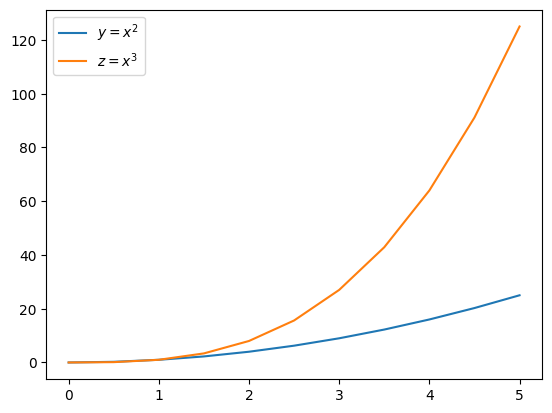

In [ ]:
x = np.linspace(0, 5, 11)                    # генерация массива аргументов функции (ось Х)
y = x**2                                     # генерация значений функции y(x)
z = x**3                                     # генерация значений функции z(x)

df = pd.DataFrame({'$y = x^2$': y,           # сформировали фрейм из двух столбцов y и z,
                   '$z = x^3$': z}, index=x) # у которых индексом является x

print(df)                                    # вывод фрейма в виде таблицы
df.plot()                                    # вывод фрейма в виде графика


В Pandas всю работу по построению и оформлению графиков и диаграмм выполняет универсальный метод <b>plot()</b>. Т.к. Pandas ориентирована на работу с фреймами данных (или сериями), то метод <b>plot()</b> применяется именно к фреймам данных (в примере выше это <code>df.plot()</code>).

Предварительно фрейм надо сформировать. В примере выше фрейм **df** построен на базе трёх NumPy массивов, два из которых (**y** и **z**) представляют визуализируемые данные (фактически - это столбцы фрейма данных), а один (**x**) - индекс этих данных (фактически, это подписи по оси абсцисс).

Т.к. мы явно не описали элементы оформления графика, метод <b>plot()</b> выбрал настройки по умолчанию. Т.к. в нашем фрейме **df** столбцы именованные, то их имена отразились в легенде графика, как имена отдельных линий (обратите внимание на работу чудесного символа $ в названии серии).

## <center> Элементы настройки линейного графика
Использование датафрейма для хранения значений математических функций встречается крайне редко. Действительно, зачем хранить эти значения, если их можно просто подсчитать. Мы эти значения положили во фрейм данных, чтобы просто показать, как в Pandas легко нарисовать график в виде линии (линейный график). При работе с реальными данными визуализация данных в форме графика обычно применяется для представления временного ряда.
    
В качестве примера временного ряда возьмём выдуманный набор из 14 целочисленных значений. Т.к. это одномерный набор, то естественным представлением для него будет Series (серия данных). По умолчанию нумерация элементов серии начинается с нуля. Сделаем так, чтобы нумерация (индексы элементов) начиналась с единицы и вызовем у серии метод <b>plot()</b>:

<Axes: >

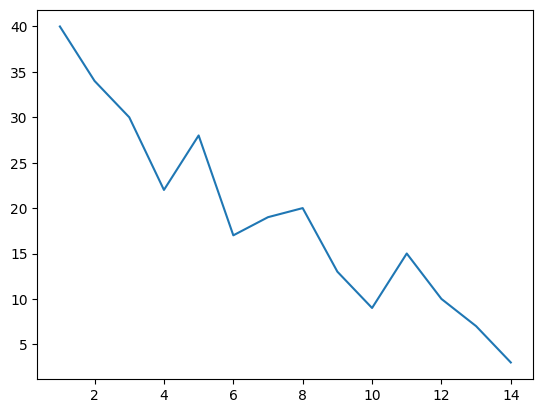

In [ ]:
x = np.linspace(1, 14, 14)
a = pd.Series([40, 34, 30, 22, 28, 17, 19, 20, 13, 9, 15, 10, 7, 3], index = x)
a.plot()

Будем считать, что на графике представлена температура в Тюмени в первые две недели февраля. Индекс представляет номер дня в феврале.

Если необходимо добавить в оформление линейного графика новые элементы или настроить существующие, то следует использовать параметры метода **plot()**.
    
Например:

<Axes: title={'center': 'Температура в Тюмени в феврале'}>

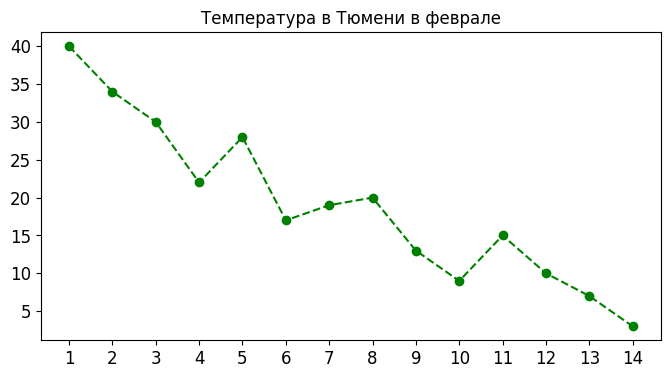

In [ ]:
a.plot(figsize=(8, 4), color='green', style='o--', title = 'Температура в Тюмени в феврале', fontsize=12, xticks=x)

В настройках мы изменили:
- размер изображения, увеличив площадку отрисовки графика (<code>figsize=(8, 4)</code>),
- цвет линии на зеленый (<code>color='green'</code>),
- стиль линии на пунктир с круглыми метками точек (<code>style='o--'</code>),
- текст заголовка над графиком (<code>title = 'Температура в Тюмени в феврале'</code>)
- размер шрифта для чисел на оси(<code>fontsize=12</code>).

Кстати, настройки цвета линии и размера шрифта будут действовать и для следующих графиков, пока не будут заданы новые.

Как организовано изменение шага меток по оси абцисс, догадайтесь сами или прочитайте в следующем абзаце.

Метод **plot()** имеет достаточно много параметров. Некоторые из них мы уже рассмотрели раньше или рассмотрим позже.
Некоторые представлены в списке ниже:
- **style** : Строка, задающая стиль графика (например, ko--)
- **alpha** : Прозрачность заполнения графика (от 0 до 1)
- **logy** : Использовать ли логарифмический масштаб по оси y
- **use_index** : Использовать ли объект индекс для меток оси
- **xticks** : Значения для меток оси x
- **yticks** : Значения для меток оси y
- **xlim** : Границы по оси x (например, [0, 10])
- **ylim** : Границы по оси y
- **grid** : Отображать ли сетку по осям (выключено по умолчанию)
- **subplots** : Делать ли для каждой серии график в отдельном окне (по умолчанию False).

Описание всех параметров можно найти в [документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) по этому методу.

Часто временные ряды содержат не один показатель (в нашем примере это температура воздуха в Тюмени), а сразу несколько. Для такого набора данных серии уже недостаточно и мы организуем фрейм данных **Т**. В нём мы к тюменской температуре добавим температуру ещё в двух городах - Красноярске и Салехарде. Оставим настройки оформления графка по умолчанию (метод **plot()** практически без параметров)

<Axes: title={'center': 'Температура в городах'}>

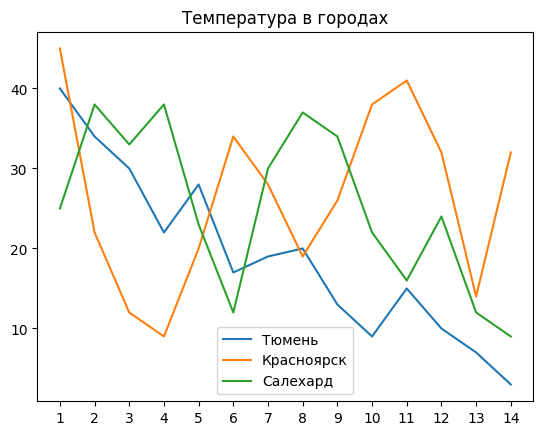

In [ ]:
b = pd.Series([45, 22, 12, 9, 20, 34, 28, 19, 26, 38, 41, 32, 14, 32], index = x)
c = pd.Series([25, 38, 33, 38, 23, 12, 30, 37, 34, 22, 16, 24, 12, 9], index = x)
T = pd.DataFrame({'Тюмень':a, 'Красноярск': b, 'Салехард': c})
T.plot(title = 'Температура в городах', xticks=x)

Выглядит несколько хаотично, но таковы наши данные.

Надеюсь, что студенты 2-го курса ТюмГУ люди разумные и заметили, что с данными созданного нами фрейма **Т** что-то не так. Действительно, февральская температура в сибирских городах выглядит довольно фантастичной. Конечно, она должна быть отрицательной!

Наши данные во  фрейме **Т** являются ненастоящими, игрушечными, выдуманными. Для проверки работы фрагментов программ программисты часто используют именно выдуманные, сгенерированные данные. Очень важно, чтобы эти данные были максимально похожими на реальные.

В данном случае наша оплошность исправляется легко. Создадим новый (правильный) фрейм **Term**, записав в него данные фрейма **Т** с обратным знаком (посмотрите, как просто это можно сделать!) и отрисуем линейный график для нового фрейма:



<Axes: title={'center': 'Температура в городах'}>

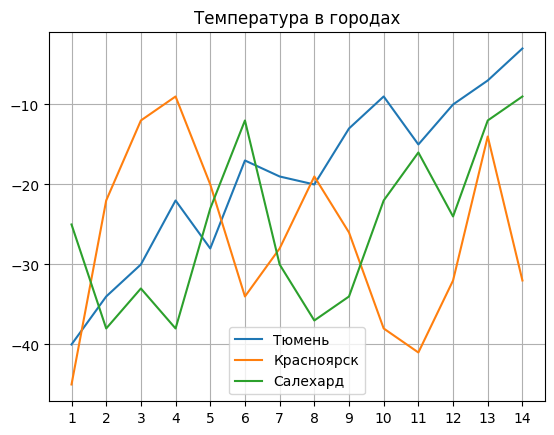

In [ ]:
Term=-T
Term.plot(title = 'Температура в городах', xticks=x, grid=True)

## <center> Виды графиков (диаграмм), доступные в Pandas
  
Среди необязательных параметров метод **plot()** имеет параметр **kind**, который определяет, какой тип графика будет создан. Значением параметра может быть одна из следующих строк:

- «**line**» – линейные графики;
- «**area**» – области под графиком;
- «**bar**» – вертикальные столбчатые диаграммы;
- «**barh**» – горизонтальные столбчатые диаграммы;
- «**box**» – коробчатые диаграммы;
- «**hist**» – гистограммы;
- «**kde**» – оценка плотности ядра (или «**density**»);
- «**pie**» – круговые диаграммы;
- «**scatter**» – диаграммы рассеяния;
- «**hexbin**» – диаграммы рассеяния с шетиугольными ячейками.
    
По умолчанию строится линейный график, как в предыдущих примерах.
    
Для построения графика другого типа используются два варианта указания на тип графика (диаграммы).
    
Первый - указать вид графика через строковое значение параметра **kind**:
    
<code>Dataframe.plot(kind = '<вид желаемого графика>', ...)</code>
          
Второй - использовать значение  **kind** как название одноименного метода, уточняющего работу метода **plot** . В некоторых редакторах кода, поддерживающих режим "подсказки", при наборе идентификатора сама среда предлагает допустимые в данном случае идентификаторы по их первым введённым символам, это упрощает поиск методов построения графиков и конкретных аргументов, которые они используют:
    
<code>Dataframe.plot.<вид желаемого графика>(...)</code>

## <center> Графики типа AREA - площадь под линией графика.
   
График площади (Area plot, зонная диаграмма) отличается от линейного графика только "раскрашенным" пространством под графиком. Посмотрите, как это выглядит для одиночного графика (используем первый вариант указания типа гафика)

<Axes: >

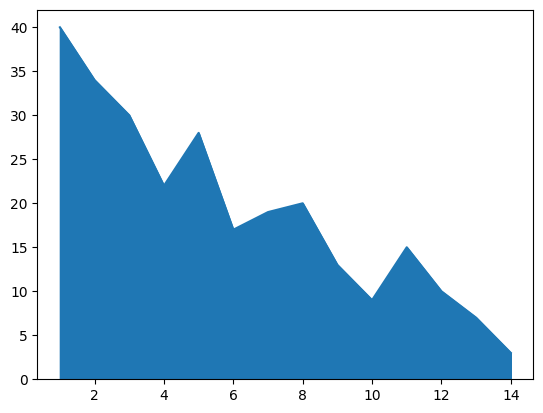

In [ ]:
a.plot(kind = 'area')

Для случая, когда отрисовываются несколько серий фрейма данных, закрашиваются пространства между графиками (а здесь мы для примера используем второй вариант указания типа графика):

<Axes: >

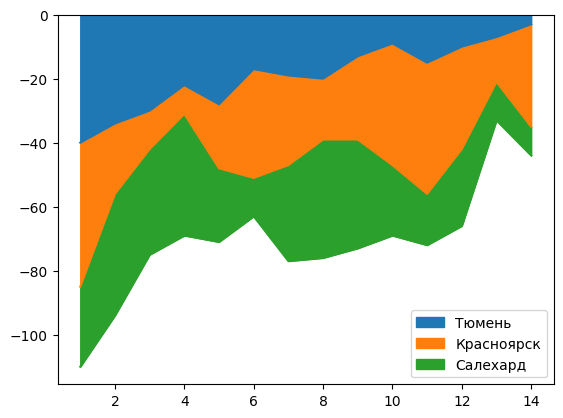

In [ ]:
Term.plot.area()

График оказался совсем непохож на своего собрата в виде линейного графика. В чём их различие и какой смысл имеют закрашеные области между графиками? Дайте ответ на этот вопрос сейчас или подумайте над ним дома. Вам этот вопрос обязательно зададут.

## <center> Круговая диаграмма PIE
Представим, что наш игрушечный фрейм данных **T** представляет не значение температуры в городах, а число ДТП в них в первые дни февраля. Сделаем клон нашего датафрейма с именем **DTP**:

In [ ]:
DTP=T.copy()
DTP.head()

,Тюмень,Красноярск,Салехард
1.0,40,45,25
2.0,34,22,38
3.0,30,12,33
4.0,22,9,38
5.0,28,20,23


Пусть нам важно посмотреть долю ДТП в отдельные дни в Тюмени. Для этого случая нам подойдёт круговая диаграмма:

<Axes: ylabel='Тюмень'>

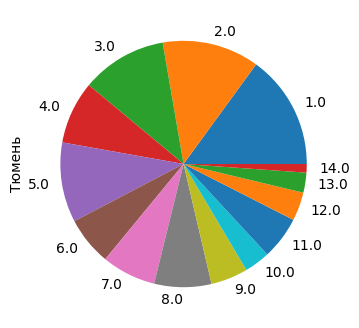

In [ ]:
DTP['Тюмень'].plot.pie(figsize=(4, 4))

Попробуем улучшить диаграмму. Для начала разберёмся с индексами. Т.к. их мы сгенерировали с помощью массива NumPy, то по умолчанию они оказались вещественными.

Сделаем их целыми:

In [ ]:
DTP.index=DTP.index.astype('int')
DTP.head()

,Тюмень,Красноярск,Салехард
1,40,45,25
2,34,22,38
3,30,12,33
4,22,9,38
5,28,20,23


Затем сделаем заголовок диаграммы и наложим на сектора их размеры в процентах

<Axes: title={'center': 'Процент ДТП по дням февраля'}, ylabel='Тюмень'>

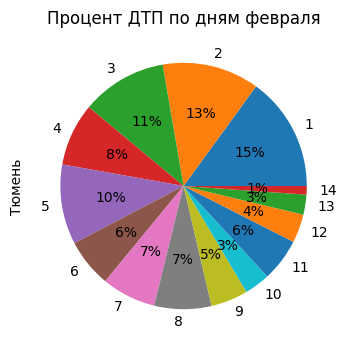

In [ ]:
DTP['Тюмень'].plot(kind = 'pie', figsize=(4, 4), autopct='%1.0f%%', title='Процент ДТП по дням февраля')

Кстати, если оператор завершить символом ";", то на консоль не будет выведена служебная информация. Посмотрите:

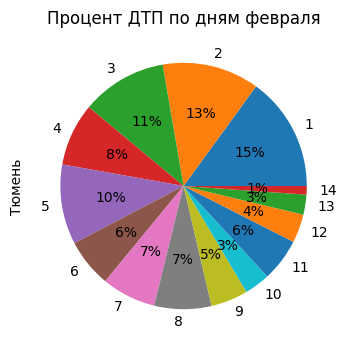

In [ ]:
DTP['Тюмень'].plot(kind = 'pie', figsize=(4, 4), autopct='%1.0f%%', title='Процент ДТП по дням февраля');

Чтобы увидеть картину по всем трём городам, закажем их круговые диаграммы как подграфики единого изображения и уберём легенду, которая будет в данном случае просто мешать (а может и не будет - проверьте).

array([<Axes: ylabel='Тюмень'>, <Axes: ylabel='Красноярск'>,
       <Axes: ylabel='Салехард'>], dtype=object)

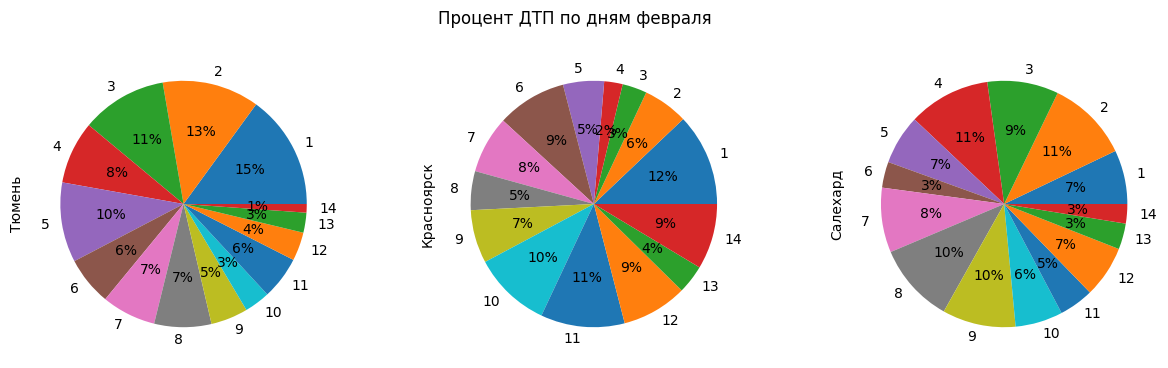

In [ ]:
DTP.plot(kind = 'pie', figsize=(15, 4), autopct='%1.0f%%', title='Процент ДТП по дням февраля',
       subplots = True, legend = False)

Возможно, нам покажется важным построить круговую диграмму, где каждый сектор представляет не день месяца, а один из трёх городов. Т.к. одна круговая диаграмма визуализирует одну серию, то и надо получить серию, где индексами будут не дни месяца, а названия городов. Но у каждого города 14 числовых значений, а для круговой диаграммы надо только одно. Пусть это будет общее число ДТП за первые дни февраля:

In [ ]:
DTP.sum()

,0
Тюмень,267
Красноярск,372
Салехард,353


Как видим, метод **sum()** вернул нужную нам серию. Индексами являются названия городов, значениями - суммарное число ДТП, а тип данных - целочисленный.
Не создавая для хранения этой серии отдельную переменную, просто визуализируем результат применения метода  **sum()** к фрейму **DTP** в виде круговой диаграммы, добавив заголовок и величину процентов каждого города в общем объеме ДТП:

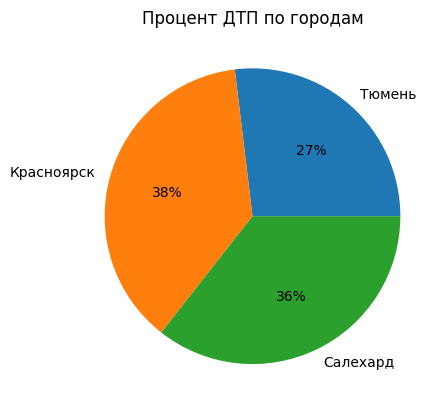

In [ ]:
DTP.sum().plot.pie(title = 'Процент ДТП по городам', autopct='%1.0f%%');

## <center> Столбиковая диаграмма BAR
  
Следует понимать, что на выбор типа диаграммы/графика оказывает влияние ещё и тип данных. Так, для демонстрации динамики температуры в г. Тюмени мы использовали линейный график. Этот выбор соответствует типу данных, т.к. значение температуры - величина непрерывная и вид графика (ломаная) тоже непрерывная величина. Количество ДТП в городах - величина дискретная, но линейный (непрерывный) график для демонстрации динамики тоже допустим, т.к. это временной ряд и по оси абцисс откладывается время - непрерывный признак. Т.е. индекс фрейма по факту - непрерывная величина.
    
Рассмотрим другой тренировочный набор данных, представляющий площадь и численность населения некоторых европейских столиц:

In [ ]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                   "Paris", "Vienna", "Bucharest", "Hamburg",
                   "Budapest", "Warsaw", "Barcelona",
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285,
                    105.4, 414.6, 228, 755,
                    525.2, 517, 101.9, 310.4,
                    181.8]
}

city = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
city


,population,area
London,8615246,1572.00
Berlin,3562166,891.85
Madrid,3165235,605.77
Rome,2874038,1285.00
Paris,2273305,105.40
Vienna,1805681,414.60
Bucharest,1803425,228.00
Hamburg,1760433,755.00
Budapest,1754000,525.20
Warsaw,1740119,517.00


Попытка показать эти данные в виде линейного графика приведёт к не очень вразумительному результату:

<Axes: >

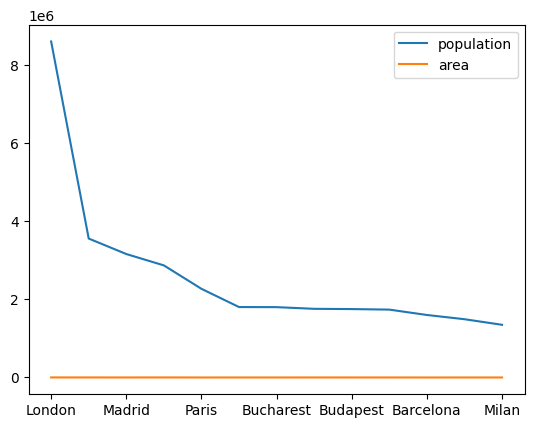

In [ ]:
city.plot()

Что здесь плохо?
1. Куда-то пропали половина названий городов. Вылечим это, указав в списке параметров перечень меток оси X

<code>xticks=range(len(city_frame.index)), use_index=True</code>

Однако легко догадаться, что в результате названия городов будут накладываться друг на друга. Вылечим и это, указав при вызове метода **plot()** в качестве параметра угол поворота в градусах для надписей отметок по горизонтальной оси:

<code>rot=90</code>

2. Странная запись "1e6" над шкалой вертикальной оси означает, что значения отметок этой оси надо умножать на $10^6$ (на миллион), т.е. в Лондоне не 8, а более 8 млн жителей.  

3. Если верить графику, площадь всех городов равна нулю. На самом деле, это не так. Просто по масштабу значения в абсолютных числах величина площади того же Лондона (1572 кв.км) в 5000 раз меньше числа его жителей (8615246 чел) и максимальный подъём графика площади будет не выше 1 пикселя. Конечно, можно выровнять масштабы графиков, указывая население в тыс. человек (т.е. поделить зачения на 1000). Но и в этом случае остаётся неоднозначное толкование шкалы вертикальной оси графика. В статистике существует подход, позволяющий разные шкалы привести к единому масштабу. Для этого одно из значений некоторого параметра объявляют базой и делят на него все значения этого параметра. В результате база становится равной 1 (100%), а другие меняются на их отношение к этой базе. Фактически, абсолютные (размерные) значения превращаются в относительные (безразмерные).

Исправим отмеченные моменты:

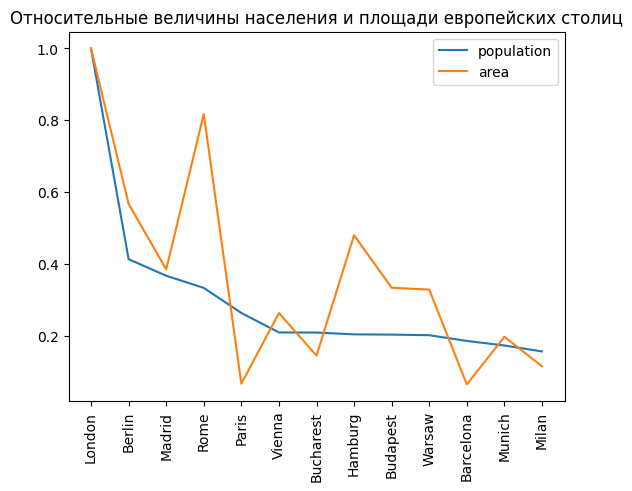

In [ ]:
# приведение данных в относительные величины
city['area']=city['area']/city['area'].iloc[0]
city['population']=city['population']/city['population'].iloc[0]
# отрисовка графика
city.plot(xticks=range(len(city.index)), use_index=True, rot=90,
         title = 'Относительные величины населения и площади европейских столиц');


Вроде неплохо получилось. Видно, что площадь Марида составляет 40% от площади Лондона, а население Варшавы в 2 раза меньше населения Берлина.

Однако, если верить графику, площадь европейских столиц от Рим до Парижа резко падает (непрерывная линия!), а от Будапешта до Варшавы почти не меняется. Дико звучит и также дико выглядит. Поэтому, в подобных случаях используют не непрерывные графики, а дискретные столбиковые диаграммы (<code>kind='bar'</code>):

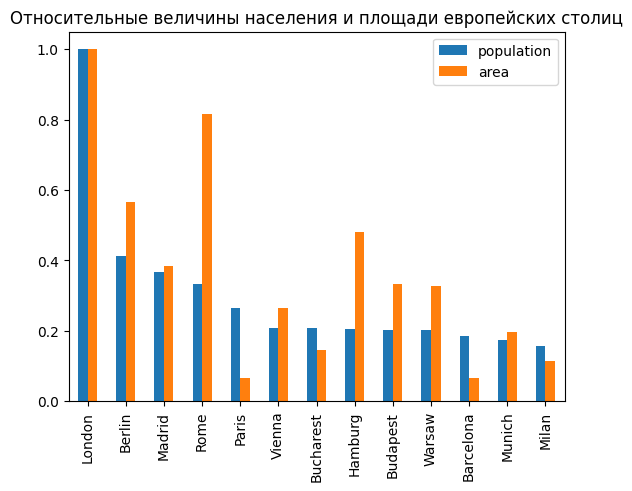

In [ ]:
city.plot(kind='bar',  title = 'Относительные величины населения и площади европейских столиц');

Применим эти же настройки для построения столбиковой диаграммы по числу ДТП. Только для визуализации оставим данные по первой неделе февраля. Найдите, где в коде указано, что берём только первые 7 строк фрейма.

Обратите вимание, что среди параметров есть <code>rot=0</code>. Если этого не указать, будет применён угол поворота подписей по горизонтальной оси в 90 градусов, установленный ранее и действующий на последующие графики.

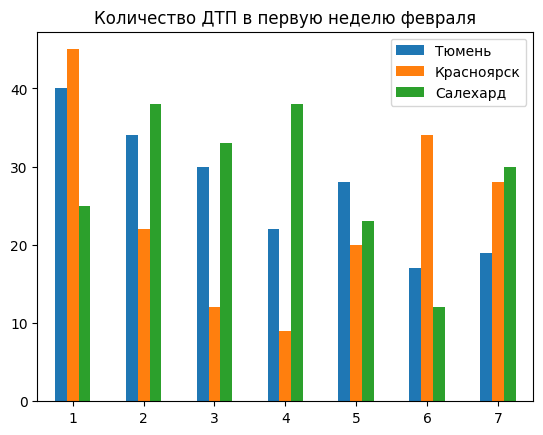

In [ ]:
DTP[:7].plot(kind='bar', rot=0, title = 'Количество ДТП в первую неделю февраля');

При желании значения параметров можно накладывать друг на друга. Для организации этого добавляем ещё один параметр <code>stacked=True</code> и дополнительно изменим палитру цветов:

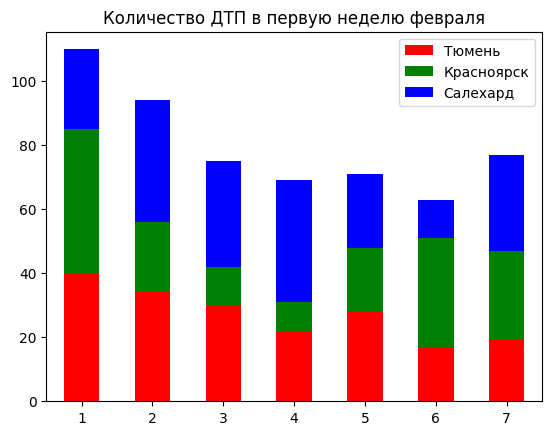

In [ ]:
DTP[:7].plot(kind='bar', rot=0, title = 'Количество ДТП в первую неделю февраля',
             stacked=True, color = ['red', 'green','blue']);

## <center> Горизонтальные полосы BARH

Иногда удобно столбиковую диаграмму транспонировать, чтобы столбики отдельных объектов превратились в горизонтальные полосы. В Pandas для построения такой диаграммы используется значение 'barh' параметра **kind**:

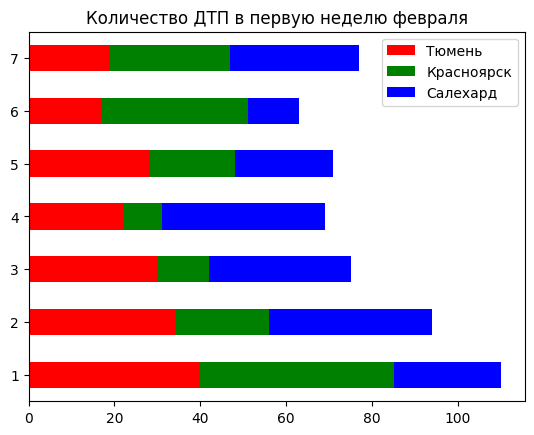

In [ ]:
DTP[:7].plot(kind='barh', rot=0, title = 'Количество ДТП в первую неделю февраля',
             stacked=True, color = ['red', 'green','blue']);

Далее мы рассмотрим виды диаграмм, которые более интересны статистикам, чем простым созерцателям. И хотя элементы статистики мы ещё не изучали, знакомство с этими диаграммами не должно быть сложным для студентов 2-го курса.

## <center> Немного о математической статистике

Как известно, математика - наука точная. Математическая статистика это один из разделов математики. Поэтому она тоже является точной наукой. И это не юмор. Всем известна крылатая фраза Марка Твена  «Существуют три вида лжи: ложь, наглая ложь и статистика». А вот это одновременно и юмор и "наглая ложь".
    
Математическая статистика не ошибается. Ошибаться может человек, неправильно применяющий правила статистики в своих исследованиях. Вся суть в том, что статистика призвана на основе наблюдения только за частью элементов (выборкой) из некоторой большой (генеральной) совокупности объектов сделать вывод о всей совокупности. Т.е., в том числе, о неизвестных наблюдателю элементах всей генеральной совокупности.  Например, математическая статистика позволяет на основе измерения роста студентов только 2-го курса ТюмГУ сделать суждение относительно среднего роста студентов всего университета (спрогнозировать, оценить, предположить). Допустим, изучив рост студентов 2-го курса, наблюдатель установил, что их средний рост примерно 172.4 см. Можем ли мы на основании этих данных оценить (предсказать) средний рост студентов всего университета?
    
И нет и да.
    
**Нет** - потому, что в данной ситуации невозможно точно оценить средний рост студентов университета одним числом. Попытка перенести оценку параметра отдельной выборки на всю совокупность (т.е. заявить, что средний рост всех студентов университета также примерно равен 172.4 см) практически всегда приводит к ошибке.
    
**Да** - потому, что грамотная статистическая оценка исследуемого параметра представляется неким интервалом и вероятностью, с которой реальная оценка окажется в этом интервале. Например, для нашей задачи о среднем росте студентов университета статистическая (предсказанная) оценка может быть вида "*с вероятностью 95% средний рост студентов всего университета окажется в диапазоне от 168.8 см до 176.0 см*". Границы диапазона есть полученная точечная оценка (172.4 см) плюс-минус статистическая погрешность (допустим, в нашем примере погрешность 3.6 см). Другими словами, если реальный средний рост студентов всего университета не попадёт в подсчитанный статистиками интервал, то такое может стучиться лишь в 5% случаев.
    
    
Очевидно, что размер данного интервала (величина статистической погрешности) зависит от объёма генеральной совокупности, объема исследованной её части (выборки), от неоднородности данных внутри выборки, от характера распределения значений измеряемого параметра. Правильным учётом этих особенностей и занимается, в частности, математическая статистика, с которой вы познакомитесь позже и которая является одним из инструментов анализа данных.
    
    

## <center> Гистограммы HIST

Одним из наглядных средств визуализиции характера распределения значений некоторого параметра для группы объектов (выборки) является гистограмма.
    
Рассмотрим данные (возраст, рост и вес) группы людей, которые мы загрузим из файла 'AHW.csv', который есть в списке ресурсов данного занятия в LMS (надеюсь, вы не забыли, как загрузить этот файл в текущую сессию Google Colab):  
    

In [ ]:
df=pd.read_csv('AHW.csv')
df

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10
...,...,...,...
736,34,1.86,95.70
737,44,1.91,106.90
738,25,1.82,88.40
739,35,1.88,98.50


Загружены данные 741 человека. Их параметры возраст, рост и вес представлены в столбцах 'Age','Height','Weight' соответственно.
Попробуем посто построить линейный график этих данных:

<Axes: >

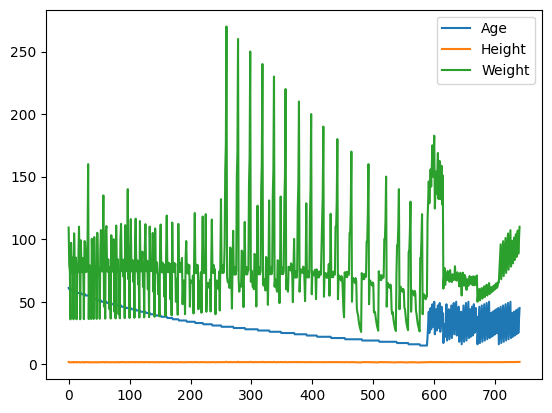

In [ ]:
df.plot()

Получили маловразумительное зрелище. Хотя, если на графике "в лоб" отображать данные нескольких сот объектов (а в статистике есть важное правило: чем больше проведено измерений, тем выше точность прогноза), то хаос будет вполне предсказуем.

Давайте посмотрим, может более информативной окажется гистограмма данных:

<Axes: ylabel='Frequency'>

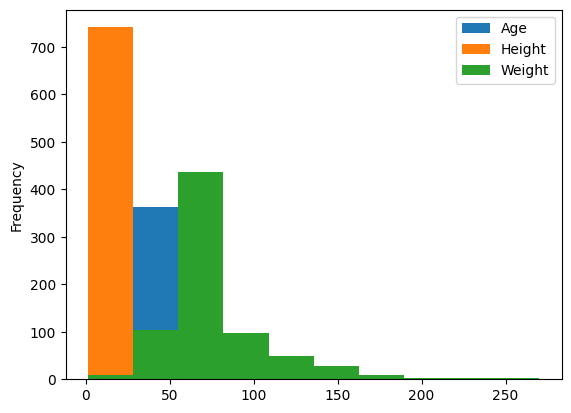

In [ ]:
df.plot.hist()

Да, понятнее не стало. Попробуем посмотреть гисограмму отдельного параметра, например, возраста:

<Axes: title={'center': 'Гистограмма возраста'}, ylabel='Frequency'>

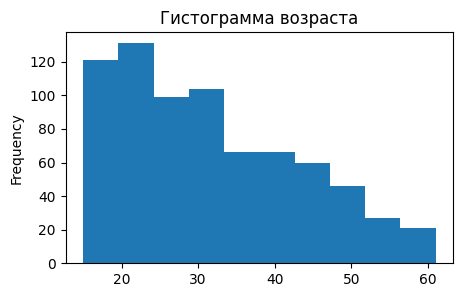

In [ ]:
df['Age'].plot.hist(title='Гистограмма возраста', figsize = (5,3))

На горизонтальной оси гистограммы расположены значения исследуемого параметра (в данном случае возраста). Видно, что минимальный возраст примерно 15 лет, а максимальный - 61 год. Весь диапазон [15, 61] разбит на 10 равных по длине интервалов (бинов). Сами интервалы не показаны, но видны столбики над каждым из бинов (10 столбиков разной высоты). Высота каждого столбика пропорциональна числу объектов выборки, значение исследуемого параметра которых попало в соответствующий бин. Само число объектов каждого бина легко увидеть на шкале вдоль вертикальной оси. Так, в первый бин (примерно от 15 до 20 лет) попали 120 человек из 741. Во второй (примерно от 21 до 25 лет) попали 130 человек. Это самый большой по числу объектов бин. Самым маленьким оказался последний 10-й бин (от 56 до 61 года). Там примерно 25 человек. Как видим, по возрасту наша выборка распределена неравномерно: основную её часть составляют молодые люди до 33 лет.

Сделаем не 10, а 25 бинов:

<Axes: title={'center': 'Гистограмма возраста'}, ylabel='Frequency'>

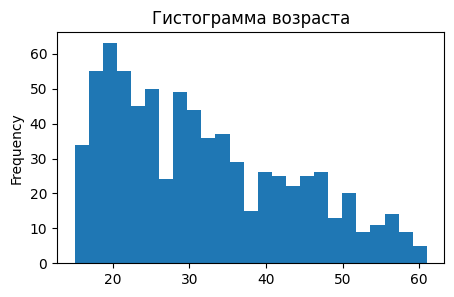

In [ ]:
df['Age'].plot.hist(title='Гистограмма возраста', figsize = (5,3), bins=25)

Бины стали короче (примерно, по два года), в каждом из них стало меньше объектов (людей). Несмотря на заметные провалы в бинах для 27-летних и 39-летних, видна тенденция к линейному уменьшению числа людей с увеличением возраста.

Сделаем 100 бинов и осмыслим результат:

<Axes: title={'center': 'Гистограмма возраста'}, ylabel='Frequency'>

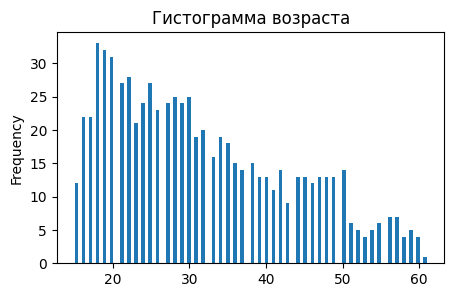

In [ ]:
df['Age'].plot.hist(title='Гистограмма возраста', figsize = (5,3), bins=100)

Т.к. бинов всего 100, то длина каждого (61-15)/100 = 0.46 года и поэтому только некоторые из них содержат целое значние возраста. А высота столбиков для этих бинов это число людей такого возраста.

Посмотрим гистораммы роста и веса (укажем для каждой по 20 бинов)

<Axes: title={'center': 'Гистограмма роста'}, ylabel='Frequency'>

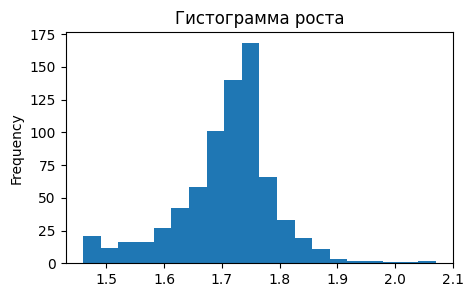

In [ ]:
df['Height'].plot.hist(title='Гистограмма роста', figsize = (5,3), bins=20)

<Axes: title={'center': 'Гистограмма веса'}, ylabel='Frequency'>

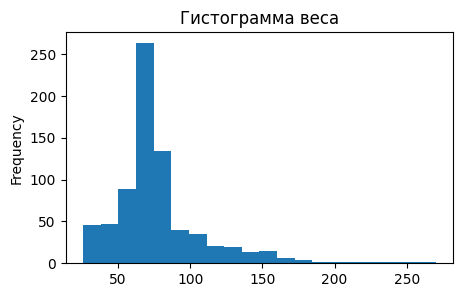

In [ ]:
df['Weight'].plot.hist(title='Гистограмма веса', figsize = (5,3), bins=20)

Здесь другая картина распределения. Наибольшими явяются средние бины, а чем ближе к крайним бинам, тем число объектов в них становится меньше и падает прочти до ноля. Такое распределение принято называть близким к нормальному. Видно, что наиболее часто встречающимся ростом является примерно 174 см, а наиболее частым весом примерно 70 кг. По гистограмме веса видно, что есть люди весом 200, 250 килограммов и даже более.

Иногда для сравнения удобно, чтобы все гистограммы попали на один график. В нашем случае это затруднительно, ибо шкалы параметров имеют разные масштабы. Нам такое уже встречалось в примере для столбиковой диаграммы и мы решили проблему перейдя от абсолютных к относительным величинам, поделив значения на базовое. В данном случае мы используем другой приём перехода к относительным значениям:  для каждого параметра приведём исходный диапазон [min, max] к диапазону [0, 1]. В результате минимальные значения будут заменены нулём, максимальные - единицей, а промежуточные - пропорционально между 0 и 1. Такой подход называется **min-max нормализацией**:  

<Axes: title={'center': 'Гистограмм'}, ylabel='Frequency'>

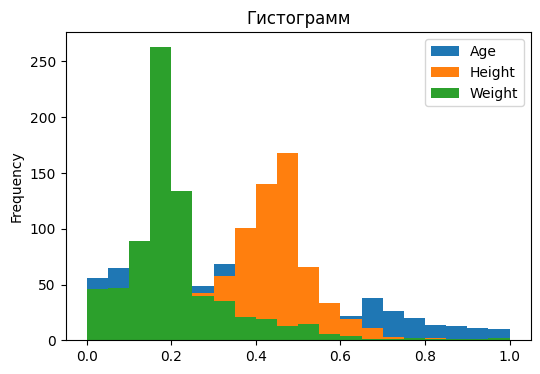

In [ ]:
n_df=(df-df.min())/(df.max()-df.min())
n_df.plot.hist(title='Гистограмм', figsize = (6,4), bins=20)

Три гистограммы на графике рисуются по очереди и поэтому последняя нарисованная из них (зеленая) частично закрасит предыдущие.

Сделаем цвет заполнения полупрозрачным:

<Axes: title={'center': 'Гистограмм'}, ylabel='Frequency'>

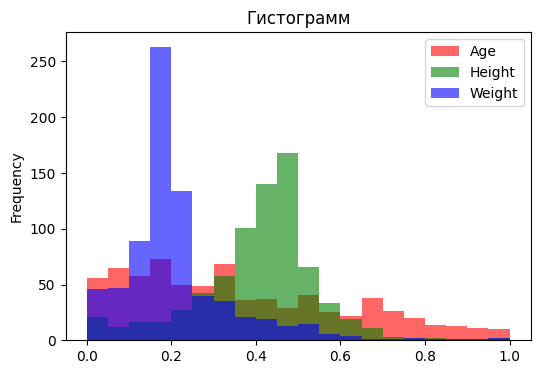

In [ ]:
n_df.plot.hist(title='Гистограмм', figsize = (6,4), bins=20, alpha = 0.6,
              color=['red','green','blue'])


## <center>Диаграмма рассеяния SCATTER

Для визуальной оценки зависимости между разными параметрами часто применяют диаграмму рассеяния.
    

<Axes: xlabel='Height', ylabel='Weight'>

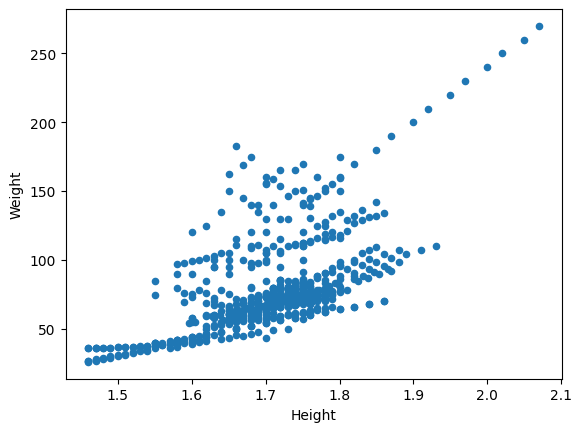

In [ ]:
df.plot.scatter(x='Height',y='Weight')

На этой диаграмме каждый объект, параметры которого соответствуют отдельной строке фрейма данных, отображаются в виде точки, координатами которой являются значения признаков, указанных в методе <code>plot()</code> как X и Y. В нашем случае в качестве x-координаты указан рост человека, а в качестве y-координаты его вес.

Рассматривая данную диаграмму можно сказать, что с увеличением роста вес человека увеличивается, но далеко не всегда эта зависимость однозначна. Видно, что имеется многочисленная группа людей (на диаграмме вытянутое нижнее облачко), для которых эта тенденция почти линейна. Внимательный исследователь заметит, что можно выделить группы точек, почти равномерно расположенных на строгих прямых линиях. Например, очень странно выглядит линия точек, идущая от цента диаграммы в правый верхний угол. Похоже, эти точки представляют собой 15 человек, у которых рост равномерно возрастает от 170 до 210 см и вес также равномерно увеличивается от 130 до 270 кг по линейному закону относительно роста. Случайно такого не бывает. Это свидетельствует о том, что данный набор тоже игрушечный, он состоит из нескольких поднаборов, часть из которых сгенерированных на компьютере по разным формулам. Для реальных данных (случайная выборка) рассеяние точек на диаграмме выглядело бы не столь регулярным.

Обычно на числовой плоскости, которая является подложкой для диаграммы рассеяния, можно отобразить лишь два параметра объекта - X и Y координаты точки, его представляющей. Но SCATTER позволяет показать и три, и даже 4 параметра.

Отобразим третий параметр человека - его возраст ('Age') в виде размера точек:

<Axes: xlabel='Height', ylabel='Weight'>

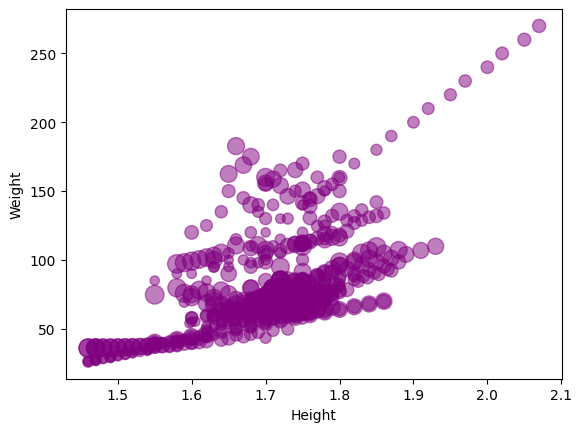

In [ ]:
df.plot.scatter(x='Height',y='Weight', s = df['Age'] * 3,
                          alpha=0.5, c='purple')

Видно, что некоторые точки больше других (свойство **s** - size). Они соответствуют более старшим людям.

Четвертого параметра у нас нет, но в качестве него мы можем взять индекс массы тела (ИМТ или BMI - body mass index) - это отношение массы человека в килограммах к квадрату его роста в метрах. Сделаем так, чтобы от ИМТ зависел цвет отдельной точки (параметр **c** - color):

<Axes: xlabel='Height', ylabel='Weight'>

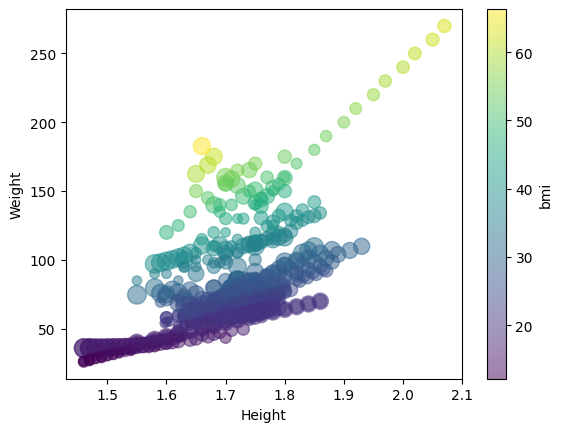

In [ ]:
df['bmi']=df['Weight']/(df['Height']*df['Height'])
df.plot.scatter(x='Height',y='Weight', s = df['Age'] * 3,
                          alpha=0.5, c='bmi')

## <center>Диаграмма рассеяния HEXBIN

Это аналог диаграммы SCATTER, где точки имеют шестиугольную форму. В каком-то смысле это и аналог гистограммы, потому, что объекты разбиваются на бины. Только в гистограмме бины одномерные - это интервалы на прямой, а здесь бины двумерные - это небольшие правильные шестиугольники, плотно заполняющие область графика, что очень похоже на пчелиные соты. Цвет каждой ячейки зависит от числа точек, попавших в неё: чем больше точек, тем цвет интенсивнее. Если одномерный бин представляет один признак, то двумерный - два (в нашем примере это **X** и **Y** - рост и вес человека).
    
Посмотрим, как выглядит такая диаграмма в самом простом случае:    

<Axes: xlabel='Height', ylabel='Weight'>

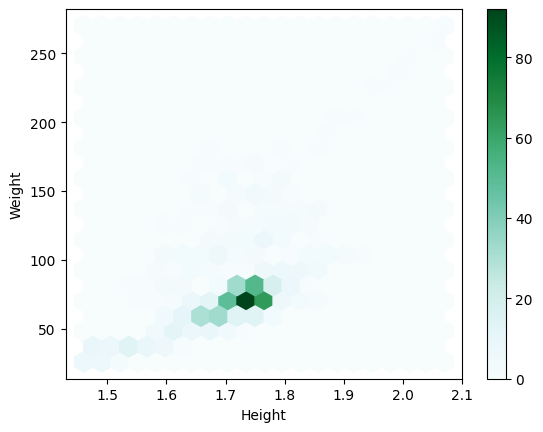

In [ ]:
df.plot.hexbin(x='Height', y='Weight', gridsize= 20)

Здесь более темный цвет представляет более высокую плотность данных, а более светлый цвет представляет более низкую плотность данных. В отличие от гистограммы, число объектов отдельного бина представлено не высотой полосок, а интенсивностью цвета. Как видим, в нашей группе наиболее частым набором (рост, вес) является пара примерно (173, 70). Соответствующий бин самый тёмный на диаграмме.

Если мы добавим дополнительный параметр «C», распределение изменится. Параметр «C» определяет, какой признак объекта отвечает за цвет ячейки, а вспомогательный параметр "reduce_C_function" уточняет, какое значение признака будет отображаться, если в ячейке окажутся несколько объектов. В примере ниже выбрано <code>C='Age', reduce_C_function=np.average</code>, значит цвет ячейки укзывает на средний возраст людей с данными ростом и весом.

<Axes: xlabel='Height', ylabel='Weight'>

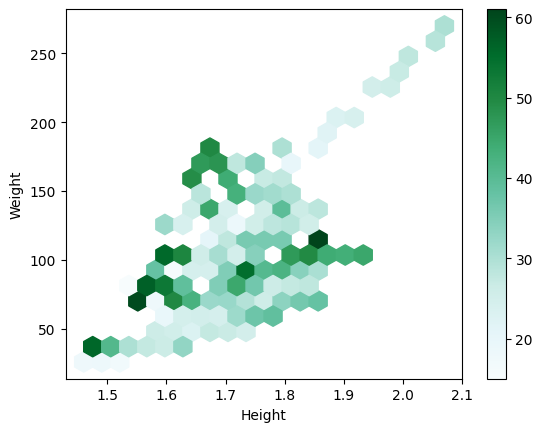

In [ ]:
    df.plot.hexbin(x='Height', y='Weight', C='Age', gridsize= 20, reduce_C_function=np.average)

## <center>Другие виды диаграмм в Pandas

Мы не будем рассматривать диаграммы вида KDE (функция распределения) и BOX (boxplot, ящичная диаграмма, ящик с усами), т.к. они требуют более серьёзных знаний в математической статистики. Но позже обязательно рассмотрим и их.
Но ничто не мешает вам прямо на занятии взять и построить их по нашим датасетам (фреймам). Посмотрите, подумайте, что там представлено, а преподаватель вам подскажет.

Кроме указанных, в Pandas есть и другие средства графической визуализиции, собранные в подбиблиотеке **pandas.plotting**. Посмотрим пример одного из них SCATTER_MATRIX:

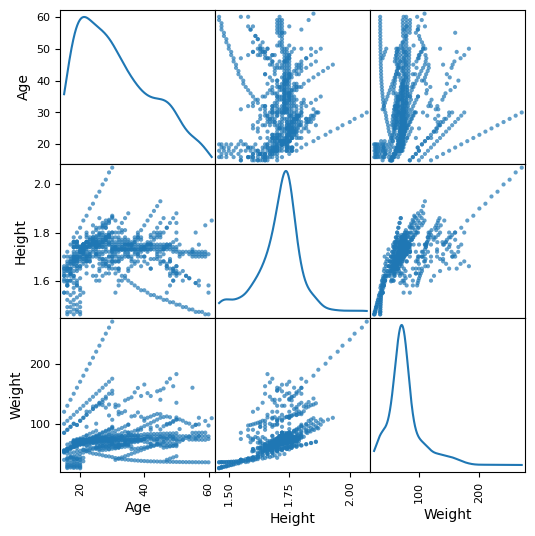

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Age', 'Height', 'Weight']],
                                           alpha = 0.7, figsize=(6, 6), diagonal = 'kde');

Это так называемая матрица диаграмм рассеяния. Строки и столбцы матрицы подписаны названиями признаков объекта. Ячейки на их пересечении представляют диаграмму рассеяния по соответсвующим признакам. Одну из них (Height-Weigh) мы уже строили  методом "scatter". По диагонали (где признаки строки и столбца совпадают) мы заказали KDE - график плотности распределения (непрерывный аналог гистограммы).  

## <center>Продвинутая визуализация данных на Python

Использовать для визуализации возможности библиотеки Pandas - это необходимый минимум для работы с данными. Для Pandas визуализация данных - вспомогательный функционал. Существует много библиотек, которые специализируются именно на визуализации данных.

Вот некторые из них:
- **Matplotlib** - обладает богатыми возможностями для построения графиков разного типа и сложности. Но настройка этих возможностей потребует от пользователя много кода.
- **Seaborn** - эта библиотека построена на базе Matplotlib. Она более высокоуровневая, что упрощает ее использование. Несмотря на то, что коллекция графиков не настолько большая, как в Matplotlib, созданные с помощью seaborn широко используемые графики при меньшем количестве кода будет выглядеть визуально приятнее.
- **Plotly** - упрощает создание интерактивных графиков типографского качества. При этом она также может создавать классические диаграммы хорошего качества буквально за несколько строчек кода.
- **Altair** - эта библиотека визуализации, предназначенная для построения графиков, требующих большого количества статистических преобразований. Altair не может обрабатывать данные, превышающие 5000 экземпляров, и некоторые простые диаграммы в нем уступают по стилю Plotly или Seaborn.
- **Bokeh** - интерактивная библиотека для визуализации, предназначенная для презентации данных в браузерах.
- **Folium** - позволяет легко визуализировать данные на интерактивной встраиваемой карте. Несмотря на то, что Plotly, Altair и Bokeh также позволяют создавать карты, Folium использует открытую уличную карту, близкую к Google Map, с помощью минимального количества кода.


Для построения традиционных диаграмм достаточно знать **Pandas**. Если требуется тонкая настройка диаграмм, то используется **Matplotlib** или **Seaborn**.

На [официальном сайте Matplotlib](https://matplotlib.org/stable/tutorials/index.html) имеется несколько несколько руководств по её использованию с загружаемыми примерами как просто кода так и учебных блокнотов **.jpynb**.

Существует [сетевой учебник](https://devpractice.ru/files/books/python/Matplotlib.book.pdf) по **Matplotlib** (на русском языке).

По запросу любой поисковик найдет десятки руководств по визуализации данных в Python разной степени полноты и солидности.